https://www.udemy.com/course/estatistica-para-ciencia-de-dados-machine-learning/l

# Medidas de posição e dispersão

## Base de dados

In [1]:
import numpy as np
import statistics
from scipy import stats
import math

In [2]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

## Média aritmética simples
 
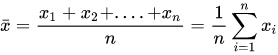 

In [3]:
dados.sum() / len(dados)

160.375

In [4]:
dados.mean()

160.375

In [5]:
statistics.mean(dados)

160

## Moda

In [6]:
statistics.mode(dados)

160

In [7]:
stats.mode(dados)

ModeResult(mode=array([160]), count=array([5]))

## Mediana

In [8]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

### Cálculo manual (ímpar)

In [9]:
posicao = len(dados_impar) / 2
posicao

4.5

In [10]:
posicao = math.ceil(posicao)
posicao

5

In [11]:
dados_impar[posicao - 1]

153

### Cálculo manual (par)

In [12]:
posicao = len(dados) // 2
posicao

20

In [13]:
dados[posicao - 1], dados[posicao]

(160, 160)

In [14]:
mediana = (dados[posicao - 1] + dados[posicao]) / 2
mediana

160.0

### Bibliotecas

In [15]:
np.median(dados_impar)

153.0

In [16]:
np.median(dados)

160.0

In [17]:
statistics.median(dados_impar)

153

In [18]:
statistics.median(dados)

160.0

## Média aritmética ponderada

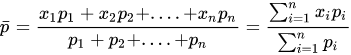

In [19]:
notas = np.array([9, 8, 7, 3])
pesos = np.array([1, 2, 3, 4])

In [20]:
(9 * 1 + 8 * 2 + 7 * 3 + 3 * 4) / (1 + 2 + 3 + 4)

5.8

In [21]:
media_ponderada = (notas * pesos).sum() / pesos.sum()
media_ponderada

5.8

In [22]:
np.average(notas, weights=pesos)

5.8

## Média aritmética, moda e mediana com distribuição de frequência (dados agrupados)

In [23]:
dados_2 = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [24]:
import pandas as pd
dataset = pd.DataFrame(dados_2)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


In [25]:
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2
dataset

,inferior,superior,fi,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,166,170,5,168.0
5,170,174,3,172.0


In [26]:
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset

,inferior,superior,fi,xi,fi.xi
0,150,154,5,152.0,760.0
1,154,158,9,156.0,1404.0
2,158,162,11,160.0,1760.0
3,162,166,7,164.0,1148.0
4,166,170,5,168.0,840.0
5,170,174,3,172.0,516.0


In [27]:
dataset['Fi'] = 0
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,0
1,154,158,9,156.0,1404.0,0
2,158,162,11,160.0,1760.0,0
3,162,166,7,164.0,1148.0,0
4,166,170,5,168.0,840.0,0
5,170,174,3,172.0,516.0,0


In [28]:
frequencia_acumulada = []
somatorio = 0
for linha in dataset.iterrows():
  #print(linha[1])
  #print(linha[1][2])
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

In [29]:
frequencia_acumulada

[5.0, 14.0, 25.0, 32.0, 37.0, 40.0]

In [30]:
dataset['Fi'] = frequencia_acumulada
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


### Média

In [31]:
dataset['fi'].sum(), dataset['fi.xi'].sum()

(40, 6428.0)

In [32]:
dataset['fi.xi'].sum() / dataset['fi'].sum()

160.7

### Moda

In [33]:
dataset['fi'].max()

11

In [34]:
dataset[dataset['fi'] == dataset['fi'].max()]

,inferior,superior,fi,xi,fi.xi,Fi
2,158,162,11,160.0,1760.0,25.0


In [35]:
dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

160.0

### Mediana

In [36]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [37]:
fi_2 = dataset['fi'].sum() / 2
fi_2

20.0

In [38]:
limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
for linha in dataset.iterrows():
  #print(linha)
  limite_inferior = linha[1][0]
  frequencia_classe = linha[1][2]
  id_frequencia_anterior = linha[0]
  if linha[1][5] >= fi_2:
    id_frequencia_anterior -= 1
    break

In [39]:
limite_inferior, frequencia_classe, id_frequencia_anterior

(158.0, 11.0, 1)

In [40]:
Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
Fi_anterior

14.0

In [41]:
mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe
mediana

160.1818181818182

### Função completa

In [42]:
def get_estatisticas(dataframe):
  media = dataset['fi.xi'].sum() / dataset['fi'].sum()
  moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

  fi_2 = dataset['fi'].sum() / 2
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for i, linha in enumerate(dataset.iterrows()):
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_2:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

  return media, moda, mediana

In [43]:
get_estatisticas(dataset)

(160.7, 160.0, 160.1818181818182)

## Média geométrica, harmônica e quadrática

### Média geométrica

Média geométrica de um conjunto de dados $ \{a_{1},a_{2},\ldots ,a_{n}\}}\{a_{1},a_{2},\ldots ,a_{n}$:

$$ \left(\prod _{i=1}^{n}a_{i}\right)^{1/n}={\sqrt[{n}]{a_{1}a_{2}\cdots a_{n}}}.\left(\prod _{{i=1}}^{n}a_{i}\right)^{{1/n}}={\sqrt[ {n}]{a_{1}a_{2}\cdots a_{n}}}.$$

In [44]:
from scipy.stats import gmean

In [45]:
gmean(dados)

160.26958390038905

### Média harmônica

$${\displaystyle {\bar {h}}={\frac {n}{{\frac {1}{x_{1}}}+{\frac {1}{x_{2}}}+\cdots +{\frac {1}{x_{n}}}}}={\frac {n}{\sum _{i=1}^{n}{\frac {1}{x_{i}}}}}={\frac {n\cdot \prod _{j=1}^{n}x_{j}}{\sum _{i=1}^{n}{\frac {\prod _{j=1}^{n}x_{j}}{x_{i}}}}}.}$$

In [46]:
from scipy.stats import hmean

In [47]:
hmean(dados)

160.16471947994674

### Média quadrática

$${  x_{q}={\sqrt {\frac {x_{1}^{2}+x_{2}^{2}+\ldots +x_{n}^{2}}{n}}}\,}$$

In [48]:
def quadratic_mean(dados):
  return math.sqrt(sum(n * n for n in dados) / len(dados))

In [49]:
quadratic_mean(dados)

160.48091786876097

## Quartis

In [50]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

### Cálculo manual

In [51]:
np.median(dados_impar)

153.0

In [52]:
posicao_mediana = math.floor(len(dados_impar) / 2)
posicao_mediana

4

In [53]:
esquerda = dados_impar[0:posicao_mediana]
esquerda

[150, 151, 152, 152]

In [54]:
np.median(esquerda)

151.5

In [55]:
direita = dados_impar[posicao_mediana + 1:]
direita

[154, 155, 155, 155]

In [56]:
np.median(direita)

155.0

### Bibliotecas

#### numpy

In [57]:
np.quantile(dados_impar, 0.5)

153.0

In [58]:
np.quantile(dados_impar, 0.75)

155.0

In [59]:
np.quantile(dados_impar, 0.25)

152.0

In [60]:
esquerda2 = dados_impar[0:posicao_mediana + 1]
esquerda2

[150, 151, 152, 152, 153]

In [61]:
np.median(esquerda2)

152.0

In [62]:
np.quantile(dados, 0.25), np.quantile(dados, 0.50), np.quantile(dados, 0.75)

(155.75, 160.0, 164.0)

#### scipy

In [63]:
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados, 75)

(155.75, 160.0, 164.0)

#### pandas

In [64]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [65]:
dataset.quantile([0.25, 0.5, 0.75])

,inferior,superior,fi,xi,fi.xi,Fi
0.25,155.0,159.0,5.0,157.0,780.0,16.75
0.50,160.0,164.0,6.0,162.0,994.0,28.50
0.75,165.0,169.0,8.5,167.0,1340.0,35.75


In [66]:
dataset.describe()

,inferior,superior,fi,xi,fi.xi,Fi
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,160.000000,164.000000,6.666667,162.000000,1071.333333,25.500000
std,7.483315,7.483315,2.943920,7.483315,458.180168,13.693064
min,150.000000,154.000000,3.000000,152.000000,516.000000,5.000000
25%,155.000000,159.000000,5.000000,157.000000,780.000000,16.750000
50%,160.000000,164.000000,6.000000,162.000000,994.000000,28.500000
75%,165.000000,169.000000,8.500000,167.000000,1340.000000,35.750000
max,170.000000,174.000000,11.000000,172.000000,1760.000000,40.000000


## Quartis com distribuição de frequência (dados agrupados)

In [67]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [68]:
def get_quartil(dataset, q1=True):
    if q1 == True:
        fi_4 = dataset['fi'].sum() / 4
    else:
        fi_4 = (3 * dataset['fi'].sum()) / 4

    limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
    for linha in dataset.iterrows():
        limite_inferior = linha[1][0]
        frequencia_classe = linha[1][2]
        id_frequencia_anterior = linha[0]
        if linha[1][5] >= fi_4:
            id_frequencia_anterior -= 1
            break
    Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
    q = limite_inferior + ((fi_4 - Fi_anterior) * 4) / frequencia_classe

    return q

In [69]:
get_quartil(dataset), get_quartil(dataset, q1 = False)

(156.22222222222223, 164.85714285714286)

## Percentis

In [70]:
np.median(dados)

160.0

In [71]:
np.quantile(dados, 0.5)

160.0

In [72]:
np.percentile(dados, 50)

160.0

In [73]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 90)

(151.95, 152.9, 168.1)

In [74]:
stats.scoreatpercentile(dados, 5), stats.scoreatpercentile(dados, 10), stats.scoreatpercentile(dados, 90)

(151.95000000000002, 152.89999999999998, 168.1)

In [75]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [76]:
dataset.quantile([0.05, 0.10, 0.90])

,0
0.05,151.95
0.10,152.90
0.90,168.10


## Exercício

In [77]:
dataset_2 = pd.read_csv('data/census.csv')

In [78]:
dataset_2.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
dataset_2['age'].mean()

38.58164675532078

In [80]:
stats.hmean(dataset_2['age'])

33.91874139089839

In [81]:
from scipy.stats.mstats import gmean
gmean(dataset_2['age'])

36.210879158177256

In [82]:
quadratic_mean(dataset_2['age'])

40.9218664329987

In [83]:
dataset_2['age'].median()

37.0

In [84]:
statistics.mode(dataset_2['age'])

36

## Medidas de dispersão

### Amplitude total e diferença interquartil

In [85]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [86]:
dados.max() - dados.min()

23

In [87]:
q1 = np.quantile(dados, 0.25)
q3 = np.quantile(dados, 0.75)
q1, q3

(155.75, 164.0)

In [88]:
diferenca_interquartil = q3 - q1
diferenca_interquartil

8.25

In [89]:
inferior = q1 - (1.5 * diferenca_interquartil)
inferior

143.375

In [90]:
superior = q3 + (1.5 * diferenca_interquartil)
superior

176.375

### Variância, desvio padrão e coeficiente de variação

In [91]:
dados_impar = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155])

#### Cálculo manual

In [92]:
media = dados_impar.sum() / len(dados_impar)
media

153.0

In [93]:
desvio = abs(dados_impar - media)
desvio

array([3., 2., 1., 1., 0., 1., 2., 2., 2.])

In [94]:
desvio = desvio ** 2
desvio

array([9., 4., 1., 1., 0., 1., 4., 4., 4.])

In [95]:
soma_desvio = desvio.sum()
soma_desvio

28.0

In [96]:
v = soma_desvio / len(dados_impar)
v

3.111111111111111

In [97]:
dp = math.sqrt(v)
dp

1.7638342073763937

In [98]:
cv = (dp / media) * 100
cv

1.1528328152786886

In [99]:
def get_variancia_desvio_padrao_coeficiente(dataset):
  media = dataset.sum() / len(dataset)
  desvio = abs(dados_impar - media)
  desvio = desvio ** 2
  soma_desvio = desvio.sum()
  variancia = soma_desvio / len(dados_impar)
  dp = math.sqrt(variancia)
  return variancia, dp, (dp / media) * 100

In [100]:
get_variancia_desvio_padrao_coeficiente(dados_impar)

(3.111111111111111, 1.7638342073763937, 1.1528328152786886)

#### Bibliotecas

In [101]:
np.var(dados_impar)

3.111111111111111

In [102]:
np.std(dados_impar)

1.7638342073763937

In [103]:
np.var(dados)

33.984375

In [104]:
np.std(dados)

5.829611908180509

In [105]:
statistics.variance(dados)

34

In [106]:
statistics.stdev(dados)

5.830951894845301

In [107]:
from scipy import ndimage
ndimage.variance(dados)

33.984375

In [108]:
stats.tstd(dados, ddof = 0)

5.829611908180509

In [109]:
stats.variation(dados_impar) * 100

1.1528328152786886

In [110]:
stats.variation(dados) * 100

3.634987939629312

### Desvio padrão com dados agrupados

In [111]:
dataset

,0
0,150
1,151
2,152
3,152
4,153
5,154
6,155
7,155
8,155
9,155


In [112]:
dataset['xi_2'] = dataset['xi'] * dataset['xi']
dataset

KeyError: 'xi'

In [333]:
dataset['fi_xi_2'] = dataset['fi'] * dataset['xi_2']
dataset

,inferior,superior,fi,xi,fi.xi,Fi,xi_2,fi_xi_2
0,150,154,5,152.0,760.0,5.0,23104.0,115520.0
1,154,158,9,156.0,1404.0,14.0,24336.0,219024.0
2,158,162,11,160.0,1760.0,25.0,25600.0,281600.0
3,162,166,7,164.0,1148.0,32.0,26896.0,188272.0
4,166,170,5,168.0,840.0,37.0,28224.0,141120.0
5,170,174,3,172.0,516.0,40.0,29584.0,88752.0


In [334]:
dataset.columns

Index(['inferior', 'superior', 'fi', 'xi', 'fi.xi', 'Fi', 'xi_2', 'fi_xi_2'], dtype='object')

In [335]:
colunas_ordenadas = ['inferior', 'superior', 'fi', 'xi', 'fi.xi', 'xi_2', 'fi_xi_2', 'Fi']

In [336]:
dataset = dataset[colunas_ordenadas]
dataset

,inferior,superior,fi,xi,fi.xi,xi_2,fi_xi_2,Fi
0,150,154,5,152.0,760.0,23104.0,115520.0,5.0
1,154,158,9,156.0,1404.0,24336.0,219024.0,14.0
2,158,162,11,160.0,1760.0,25600.0,281600.0,25.0
3,162,166,7,164.0,1148.0,26896.0,188272.0,32.0
4,166,170,5,168.0,840.0,28224.0,141120.0,37.0
5,170,174,3,172.0,516.0,29584.0,88752.0,40.0


In [340]:
dp = math.sqrt(dataset['fi_xi_2'].sum() / dataset['fi'].sum() - math.pow(dataset['fi.xi'].sum() / dataset['fi'].sum(), 2))
dp

5.719265687131764

## Testes com algoritmos de classificação

In [341]:
import pandas as pd
dataset = pd.read_csv('data/credit_data.csv')

In [342]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

In [343]:
dataset

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [344]:
X = dataset.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [345]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [347]:
resultados_naive_bayes = []
resultados_logistica = []
resultados_forest = []
for i in range(30):
  X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2,
                                                                    stratify = y, random_state = i)
  naive_bayes = GaussianNB()
  naive_bayes.fit(X_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(X_teste)))

  logistica = LogisticRegression()
  logistica.fit(X_treinamento, y_treinamento)
  resultados_logistica.append(accuracy_score(y_teste, logistica.predict(X_teste)))

  random_forest = RandomForestClassifier()
  random_forest.fit(X_treinamento, y_treinamento)
  resultados_forest.append(accuracy_score(y_teste, random_forest.predict(X_teste)))

In [348]:
print(resultados_naive_bayes)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [349]:
print(resultados_logistica)

[0.9325, 0.91, 0.9125, 0.9225, 0.9075, 0.89, 0.91, 0.9075, 0.8775, 0.915, 0.9175, 0.9, 0.925, 0.9175, 0.9025, 0.9125, 0.9525, 0.91, 0.9225, 0.9075, 0.925, 0.905, 0.9075, 0.945, 0.9225, 0.9275, 0.9225, 0.9175, 0.91, 0.9]


In [350]:
print(resultados_forest)

[0.9775, 0.99, 0.9825, 0.9975, 0.9725, 0.9825, 0.9875, 0.9925, 0.9775, 0.99, 0.98, 0.9775, 0.9775, 0.985, 0.98, 0.9775, 0.985, 0.9875, 0.9925, 0.9875, 0.975, 0.98, 0.9775, 0.9875, 0.985, 0.9925, 0.99, 0.985, 0.9925, 0.99]


In [351]:
type(resultados_naive_bayes)

list

In [353]:
resultados_naive_bayes = np.array(resultados_naive_bayes)
resultados_logistica = np.array(resultados_logistica)
resultados_forest = np.array(resultados_forest)

In [354]:
type(resultados_naive_bayes)

numpy.ndarray

### Média

In [355]:
resultados_naive_bayes.mean(), resultados_logistica.mean(), resultados_forest.mean()

(0.92425, 0.9145, 0.9844999999999999)

### Moda

In [356]:
statistics.mode(resultados_naive_bayes)

0.925

In [357]:
stats.mode(resultados_naive_bayes), stats.mode(resultados_logistica), stats.mode(resultados_forest)

(ModeResult(mode=array([0.9175]), count=array([5])),
 ModeResult(mode=array([0.9075]), count=array([4])),
 ModeResult(mode=array([0.9775]), count=array([6])))

### Mediana

In [358]:
np.median(resultados_naive_bayes), np.median(resultados_logistica), np.median(resultados_forest)

(0.925, 0.9125, 0.985)

### Variância

In [359]:
np.set_printoptions(suppress=True)
np.var(resultados_naive_bayes), np.var(resultados_logistica), np.var(resultados_forest)

(8.756250000000001e-05, 0.00020933333333333337, 3.9333333333333406e-05)

In [360]:
np.min([8.756250000000001e-05, 0.00020933333333333337, 2.9229166666666637e-05])

2.9229166666666637e-05

In [361]:
np.max([8.756250000000001e-05, 0.00020933333333333337, 2.9229166666666637e-05])

0.00020933333333333337

In [362]:
resultados_forest

array([0.9775, 0.99  , 0.9825, 0.9975, 0.9725, 0.9825, 0.9875, 0.9925,
       0.9775, 0.99  , 0.98  , 0.9775, 0.9775, 0.985 , 0.98  , 0.9775,
       0.985 , 0.9875, 0.9925, 0.9875, 0.975 , 0.98  , 0.9775, 0.9875,
       0.985 , 0.9925, 0.99  , 0.985 , 0.9925, 0.99  ])

### Desvio padrão

In [363]:
np.std(resultados_naive_bayes), np.std(resultados_logistica), np.std(resultados_forest)

(0.00935748363610645, 0.014468356276140472, 0.0062716292407422655)

### Coeficiente de variação

In [364]:
stats.variation(resultados_naive_bayes) * 100, stats.variation(resultados_logistica) * 100, stats.variation(resultados_forest) * 100

(1.0124407504578252, 1.5821056616884057, 0.6370369975360352)

### Exercício: validação cruzada

In [365]:
from sklearn.model_selection import cross_val_score, KFold

In [366]:
resultados_naive_bayes_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv=kfold)
    resultados_naive_bayes_cv.append(scores.mean())

    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv=kfold)
    resultados_logistica_cv.append(scores.mean())

    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv=kfold)
    resultados_forest_cv.append(scores.mean())

In [367]:
scores, 10 * 30

(array([0.985     , 0.985     , 0.99      , 0.99      , 0.98      ,
        0.98      , 0.99      , 0.98492462, 0.98994975, 1.        ]),
 300)

In [368]:
scores.mean()

0.9874874371859297

In [369]:
print(resultados_naive_bayes_cv)

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [370]:
print(resultados_logistica_cv)

[0.9113718592964826, 0.9103668341708543, 0.918359296482412, 0.9158768844221106, 0.9133417085427136, 0.9108718592964824, 0.9188366834170856, 0.9188969849246231, 0.913356783919598, 0.9148693467336683, 0.9098718592964824, 0.9183542713567838, 0.9183793969849248, 0.9213618090452261, 0.9098643216080402, 0.914356783919598, 0.9103693467336684, 0.915856783919598, 0.9128542713567839, 0.9123668341708543, 0.9208944723618091, 0.9108668341708542, 0.9103467336683417, 0.9133768844221105, 0.9098592964824121, 0.9148768844221105, 0.910859296482412, 0.9113768844221104, 0.9113668341708543, 0.9098442211055277]


In [371]:
print(resultados_forest_cv)

[0.9864748743718593, 0.9849824120603016, 0.9839773869346734, 0.9869773869346734, 0.9894849246231155, 0.9854849246231157, 0.9869698492462312, 0.9869874371859296, 0.9859773869346734, 0.9854824120603014, 0.9879798994974875, 0.9854723618090453, 0.9859773869346734, 0.9874773869346735, 0.9864874371859296, 0.9884824120603015, 0.9874849246231155, 0.9869723618090452, 0.9859748743718594, 0.9849824120603016, 0.9854748743718593, 0.9879824120603015, 0.9844798994974875, 0.9874798994974874, 0.9859773869346734, 0.9889899497487435, 0.9889798994974874, 0.9859773869346734, 0.9894924623115579, 0.9874874371859297]


In [372]:
stats.variation(resultados_naive_bayes) * 100, stats.variation(resultados_logistica) * 100, stats.variation(resultados_forest) * 100

(1.0124407504578252, 1.5821056616884057, 0.6370369975360352)

In [373]:
stats.variation(resultados_naive_bayes_cv) * 100, stats.variation(resultados_logistica_cv) * 100, stats.variation(resultados_forest_cv) * 100

(0.08641071566366061, 0.38801026116292653, 0.14576388566864656)

### Seleção de atributos utilizando variância

In [374]:
np.random.rand(50)

array([0.65011326, 0.77950912, 0.75987476, 0.53341539, 0.72104322,
       0.1286123 , 0.49498014, 0.00234075, 0.84157667, 0.62199877,
       0.0930178 , 0.78403598, 0.73174513, 0.08908437, 0.37404426,
       0.90559044, 0.18038518, 0.3405707 , 0.15720037, 0.66159875,
       0.55452998, 0.95849469, 0.6401098 , 0.90586295, 0.07729126,
       0.12559406, 0.69794394, 0.41095521, 0.6197089 , 0.18475604,
       0.96792761, 0.57083287, 0.64807861, 0.13244953, 0.53077974,
       0.87489722, 0.60213704, 0.08685461, 0.31323013, 0.31756019,
       0.64101358, 0.9997699 , 0.76956635, 0.78009186, 0.0388165 ,
       0.23475941, 0.61011039, 0.94085351, 0.78945529, 0.84853608])

In [375]:
np.random.randint(0, 2)

1

In [376]:
base_selecao = {'a': np.random.rand(20),
                'b': np.array([0.5] * 20),
                'classe': np.random.randint(0, 2, size = 20)}

In [377]:
base_selecao

{'a': array([0.00414812, 0.95717494, 0.91153179, 0.71950405, 0.38029712,
        0.79689099, 0.90359944, 0.24347232, 0.78759085, 0.328342  ,
        0.13717592, 0.66260349, 0.03070092, 0.30451007, 0.31293141,
        0.42400474, 0.03283116, 0.51650389, 0.39933359, 0.98700847]),
 'b': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'classe': array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])}

In [378]:
dataset = pd.DataFrame(base_selecao)
dataset.head()

,a,b,classe
0,0.004148,0.5,1
1,0.957175,0.5,0
2,0.911532,0.5,1
3,0.719504,0.5,0
4,0.380297,0.5,1


In [379]:
dataset.describe()

,a,b,classe
count,20.000000,20.0,20.000000
mean,0.492008,0.5,0.450000
std,0.327481,0.0,0.510418
min,0.004148,0.5,0.000000
25%,0.289251,0.5,0.000000
50%,0.411669,0.5,0.000000
75%,0.789916,0.5,1.000000
max,0.987008,0.5,1.000000


In [380]:
math.sqrt(0.08505323963215053)

0.2916388856653902

In [381]:
np.var(dataset['a']), np.var(dataset['b'])

(0.1018813532585846, 0.0)

In [382]:
X = dataset.iloc[:, 0:2].values
X

array([[0.00414812, 0.5       ],
       [0.95717494, 0.5       ],
       [0.91153179, 0.5       ],
       [0.71950405, 0.5       ],
       [0.38029712, 0.5       ],
       [0.79689099, 0.5       ],
       [0.90359944, 0.5       ],
       [0.24347232, 0.5       ],
       [0.78759085, 0.5       ],
       [0.328342  , 0.5       ],
       [0.13717592, 0.5       ],
       [0.66260349, 0.5       ],
       [0.03070092, 0.5       ],
       [0.30451007, 0.5       ],
       [0.31293141, 0.5       ],
       [0.42400474, 0.5       ],
       [0.03283116, 0.5       ],
       [0.51650389, 0.5       ],
       [0.39933359, 0.5       ],
       [0.98700847, 0.5       ]])

In [383]:
from sklearn.feature_selection import VarianceThreshold

In [384]:
selecao = VarianceThreshold(threshold=0.07)
X_novo = selecao.fit_transform(X)

In [385]:
X_novo, X_novo.shape

(array([[0.00414812],
        [0.95717494],
        [0.91153179],
        [0.71950405],
        [0.38029712],
        [0.79689099],
        [0.90359944],
        [0.24347232],
        [0.78759085],
        [0.328342  ],
        [0.13717592],
        [0.66260349],
        [0.03070092],
        [0.30451007],
        [0.31293141],
        [0.42400474],
        [0.03283116],
        [0.51650389],
        [0.39933359],
        [0.98700847]]),
 (20, 1))

In [386]:
selecao.variances_

array([0.10188135, 0.        ])

In [387]:
indices = np.where(selecao.variances_ > 0.07)
indices

(array([0]),)

#### Exercício seleção de atributos utilizando variância

In [388]:
dataset = pd.read_csv('data/credit_data.csv')

In [389]:
dataset.dropna(inplace=True)

In [390]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [391]:
dataset.describe()

,i#clientid,income,age,loan,c#default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [392]:
X = dataset.iloc[:, 1:4].values
X

array([[66155.92509508,    59.01701507,  8106.53213129],
       [34415.15396582,    48.1171531 ,  6564.74501768],
       [57317.17006303,    63.10804949,  8020.95329639],
       ...,
       [44311.44926231,    28.0171669 ,  5522.78669326],
       [43756.05660491,    63.97179584,  1622.72259832],
       [69436.57955155,    56.15261703,  7378.83359873]])

In [393]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [394]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [395]:
X

array([[0.9231759 , 0.95743135, 0.58883739],
       [0.28812165, 0.86378597, 0.47682695],
       [0.74633429, 0.99257918, 0.58262011],
       ...,
       [0.48612202, 0.69109837, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.93282208, 0.53597028]])

In [396]:
selecao = VarianceThreshold(threshold=0.027)
X_novo = selecao.fit_transform(X)

In [397]:
X_novo

array([[0.9231759 , 0.58883739],
       [0.28812165, 0.47682695],
       [0.74633429, 0.58262011],
       ...,
       [0.48612202, 0.40112895],
       [0.47500998, 0.1177903 ],
       [0.98881367, 0.53597028]])

In [398]:
np.var(X[0]), np.var(X[1]), np.var(X[2])

(0.027646353650092187, 0.05741515340722347, 0.028389480276199003)

In [399]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive_sem_selecao = GaussianNB()
naive_sem_selecao.fit(X, y)
previsoes = naive_sem_selecao.predict(X)
accuracy_score(previsoes, y)

0.9253880821231848

In [400]:
naive_com_selecao = GaussianNB()
naive_com_selecao.fit(X_novo, y)
previsoes = naive_com_selecao.predict(X_novo)
accuracy_score(previsoes, y)

0.8472709063595393

## Valores faltantes com média e moda

### Média

In [401]:
import pandas as pd
dataset = pd.read_csv('data/credit_data.csv')

In [402]:
dataset.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [403]:
nulos = dataset[dataset.isnull().any(axis=1)]
nulos

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [404]:
dataset['age'].mean(), dataset['age'].median()

(40.80755937840458, 41.3171591130085)

In [405]:
dataset['age'] = dataset['age'].replace(to_replace = np.nan, value = dataset['age'].mean())

In [406]:
dataset[dataset.isnull().any(axis=1)]

,i#clientid,income,age,loan,c#default


In [407]:
dataset

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


### Moda

In [409]:
dataset = pd.read_csv('data/autos.csv', encoding='ISO-8859-1')

In [410]:
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [411]:
dataset.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [412]:
dataset['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [413]:
stats.mode(dataset['fuelType'])

ModeResult(mode=array(['benzin'], dtype=object), count=array([223857]))

In [414]:
statistics.mode(dataset['fuelType'])

'benzin'

In [415]:
dataset['fuelType'] = dataset['fuelType'].replace(to_replace = np.nan, value = statistics.mode(dataset['fuelType']))

In [416]:
dataset['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)